# Klustering K-Means

Menggunakan package dari sklearn (scikit-learn) untuk melakukan clustering. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="darkgrid")

In [37]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler



In [38]:
# Membaca data
ritel = pd.read_csv("ritel_cola.csv")
ritel.head()

,No,Ritel,Latitude,Longitude
0,1,REB,-7.008217,110.464989
1,2,VAP,-7.003715,110.450943
2,3,FGC,-6.984527,110.454158
3,4,WTD,-7.036279,110.462789
4,5,EVC,-6.978589,110.450249


In [39]:
ritel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 4 columns):
No           66 non-null int64
Ritel        66 non-null object
Latitude     66 non-null float64
Longitude    66 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.1+ KB


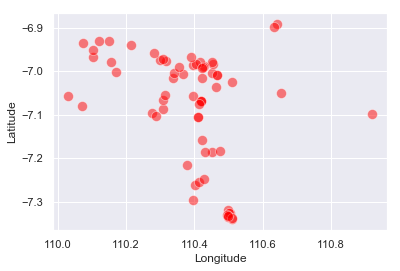

In [40]:
sns.scatterplot(x="Longitude", y="Latitude", data=ritel, s=100, 
                color="red", alpha = 0.5)

In [41]:
# Menentukan variabel yang akan di klusterkan
ritel_x = ritel.iloc[:, 2:4]
ritel_x.head()

,Latitude,Longitude
0,-7.008217,110.464989
1,-7.003715,110.450943
2,-6.984527,110.454158
3,-7.036279,110.462789
4,-6.978589,110.450249


In [42]:
# Mengubah variabel data frame menjadi array
x_array =  np.array(ritel_x)
x_array

array([[ -7.008217, 110.464989],
       [ -7.003715, 110.450943],
       [ -6.984527, 110.454158],
       [ -7.036279, 110.462789],
       [ -6.978589, 110.450249],
       [ -7.024817, 110.511323],
       [ -7.009584, 110.467616],
       [ -7.00641 , 110.365529],
       [ -6.977364, 110.317947],
       [ -7.087666, 110.308647],
       [ -6.973566, 110.300566],
       [ -6.959072, 110.283418],
       [ -7.015937, 110.338447],
       [ -7.067615, 110.307174],
       [ -7.097256, 110.27487 ],
       [ -7.055325, 110.315241],
       [ -7.00553 , 110.33919 ],
       [ -6.972632, 110.308671],
       [ -6.989852, 110.355891],
       [ -7.102746, 110.287581],
       [ -7.158555, 110.421421],
       [ -7.215532, 110.378193],
       [ -7.186135, 110.45223 ],
       [ -7.260964, 110.400462],
       [ -7.297148, 110.394945],
       [ -7.182704, 110.473887],
       [ -7.25469 , 110.41252 ],
       [ -7.186346, 110.430766],
       [ -7.248132, 110.429553],
       [ -7.340652, 110.510407],
       [ -

In [43]:
# Menstandarkan ukuran variabel
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)

In [44]:
x_scaled

array([[0.73993327, 0.48880202],
       [0.74995381, 0.47296087],
       [0.79266243, 0.47658677],
       [0.67747292, 0.48632085],
       [0.80587922, 0.47217818],
       [0.70298502, 0.54105775],
       [0.7368906 , 0.49176477],
       [0.74395529, 0.37663052],
       [0.80860583, 0.3229673 ],
       [0.56309582, 0.31247871],
       [0.81705941, 0.30336492],
       [0.84932013, 0.28402532],
       [0.72275011, 0.34608731],
       [0.6077253 , 0.31081746],
       [0.54175041, 0.27438484],
       [0.63508036, 0.31991546],
       [0.74591399, 0.34692526],
       [0.8191383 , 0.31250578],
       [0.78081006, 0.36576074],
       [0.52953078, 0.28872037],
       [0.4053112 , 0.43966581],
       [0.27849189, 0.39091305],
       [0.34392368, 0.47441236],
       [0.17736942, 0.41602814],
       [0.09683113, 0.40980604],
       [0.3515604 , 0.49883723],
       [0.19133408, 0.42962722],
       [0.34345404, 0.45020515],
       [0.20593086, 0.44883712],
       [0.        , 0.54002468],
       [0.

In [45]:
# Menentukan dan mengkonfigurasi fungsi kmeans
kmeans = KMeans(n_clusters = 7, random_state=123)  

In [46]:
# Menentukan kluster dari data
kmeans.fit(x_scaled) 

KMeans(n_clusters=7, random_state=123)

In [47]:
# Menampilkan pusat cluster
print(kmeans.cluster_centers_)

[[0.77287896 0.41428284]
 [0.02959966 0.51722685]
 [0.80842732 0.09930538]
 [0.58036542 0.37615835]
 [0.28717195 0.44356576]
 [0.59255982 0.85140096]
 [0.99097216 0.68264579]]


In [48]:
# Menampilkan hasil kluster
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 3 0 0 0 3 3 3 0 0 0 3 4 4 4 4 1 4 4 4 4 1 1 1 1 1 1 1 1
 5 5 6 6 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0]


In [49]:
# Menambahkan kolom "kluster" dalam data frame ritel
ritel["kluster"] = kmeans.labels_
ritel.head()

,No,Ritel,Latitude,Longitude,kluster
0,1,REB,-7.008217,110.464989,0
1,2,VAP,-7.003715,110.450943,0
2,3,FGC,-6.984527,110.454158,0
3,4,WTD,-7.036279,110.462789,0
4,5,EVC,-6.978589,110.450249,0


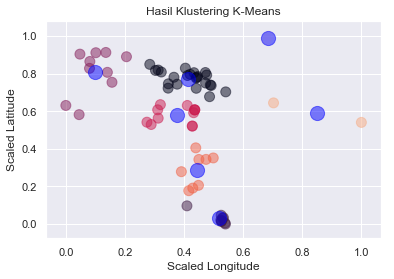

In [50]:
# Memvisualkan hasil kluster

fig, ax = plt.subplots()
sct = ax.scatter(x_scaled[:,1], x_scaled[:,0], s = 100, 
                  c = ritel.kluster, marker = "o", alpha = 0.5)

centers = kmeans.cluster_centers_
ax.scatter(centers[:,1], centers[:,0], c='blue', s=200, alpha=0.5);

plt.title("Hasil Klustering K-Means")
plt.xlabel("Scaled Longitude")
plt.ylabel("Scaled Latitude")

plt.show()

In [51]:
aa = pd.DataFrame(x_scaled)
aa.head()

,0,1
0,0.739933,0.488802
1,0.749954,0.472961
2,0.792662,0.476587
3,0.677473,0.486321
4,0.805879,0.472178


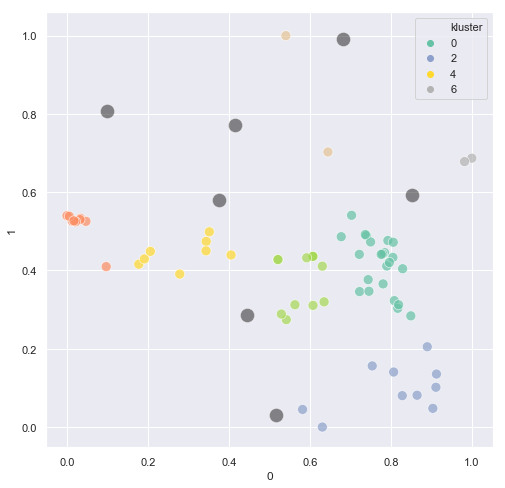

In [52]:
plt.figure(figsize=[8,8])


sns.scatterplot(0, 1, hue = ritel.kluster, 
                palette="Set2", s = 100, alpha = 0.7, data = aa)

sns.scatterplot(centers[:,1], centers[:,0], 
                color = "k", s = 200, alpha = 0.5);

# Latihan

1. Tambahkan analisis untuk menentukan jumlah kluster terbaik dengan metode WSS, silhouette atau gap statistics
3. Lakukan visualisasi mapping pada data hasil kluster

In [53]:
# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse

In [54]:
yy = calculate_WSS(x_scaled, 15)
yy

[7.258460978227711,
 2.7487251412847074,
 1.8006400436200842,
 1.3022932375464131,
 0.9439845343945102,
 0.6970951543550471,
 0.5098844545619764,
 0.42531059827423134,
 0.30742395541408973,
 0.25374554272583044,
 0.20312554939841299,
 0.15483795835355438,
 0.1278132573613954,
 0.11378334506072778,
 0.09205762494500826]

In [55]:
xx = np.arange(1, 16, 1)
xx

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

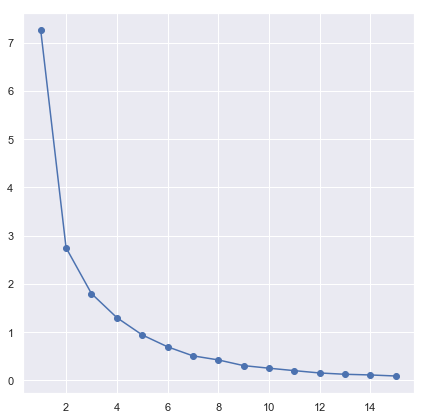

In [56]:
plt.figure(figsize=[7,7])
plt.plot(xx, yy, "b-o")
plt.show()

Berdasarkan plot WSS, ketika digunakan banyak cluster 7 atau 8, sudah cukup melandai. Sehingga, bisa digunakan 7 cluster. 

In [57]:
sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k, random_state = 123).fit(x_scaled)
  labels = kmeans.labels_
  sil.append(silhouette_score(x_scaled, labels, metric = 'euclidean'))

In [58]:
yy2 = sil
xx2 = np.arange(2,11,1)

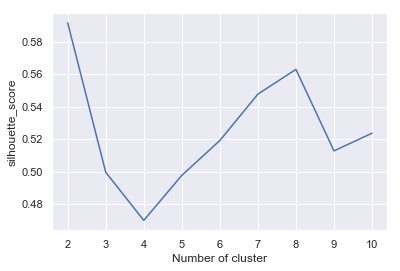

In [59]:
plt.plot(xx2, yy2)
plt.plot
plt.xlabel("Number of cluster")
plt.ylabel("silhouette_score")

plt.show()

Berdasarkan plot silhouette, paling optimal ketika digunakanbanyak kluster 2. Nilai optimal kedua dicapai ketika k = 8, dan optimal ketiga ketika k = 7. Sehingga dapat digunakan banyak kluster 7 atau 8. 

In [60]:
BBox = ((ritel.Longitude.min(),   ritel.Longitude.max(),      
         ritel.Latitude.min(), ritel.Latitude.max()))

In [61]:
BBox

(110.03157900000001, 110.91825700000001, -7.340652, -6.891375)

In [62]:
semarang = plt.imread("semarang.png")


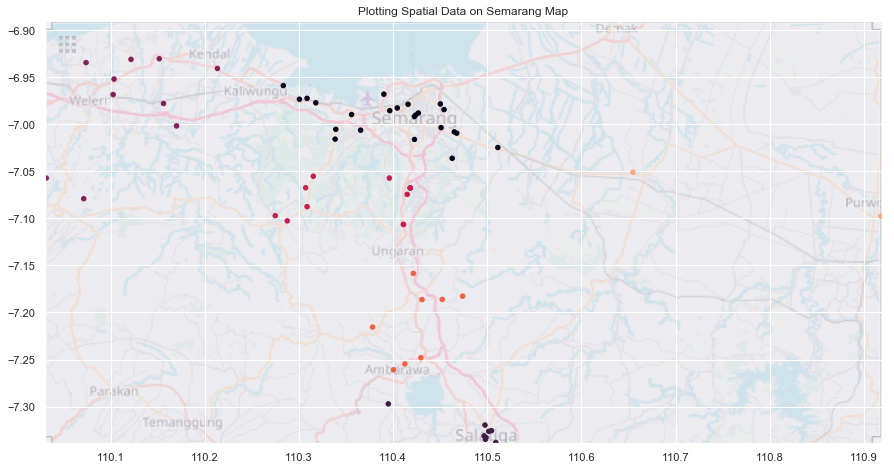

In [63]:
fig, ax = plt.subplots(figsize = (15,15))
ax.scatter(ritel.Longitude, ritel.Latitude, zorder=1, alpha= 1, c=ritel.kluster, s=20)
ax.set_title('Plotting Spatial Data on Semarang Map')
ax.set_xlim(110.0300, 110.919)
ax.set_ylim(-7.339, -6.890)
ax.imshow(semarang, zorder=0, extent = BBox, aspect= 'equal', alpha = 0.3)

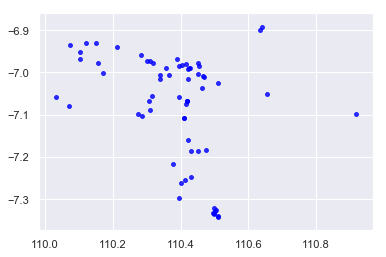

In [64]:
plt.scatter(ritel.Longitude, ritel.Latitude, zorder=1, alpha= 0.8, c='blue', s=15)